# Prueba en la base de datos telco

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [26]:
train= pd.read_excel('traintelco.xlsx')

In [27]:
train.head()

,id,Fecha de nacimiento,tipo cliente,Factura online,Antigüedad Equipo,Plan de datos,facturación,mora,Fecha inicio contrato,minutos,resultado
0,5,1990-05-01 00:05:22.046,2,1,9,0,44588,34,2017-12-22 10:09:47.504,644,0
1,8,1980-06-30 19:08:57.680,2,0,41,1,341480,3,2017-07-28 02:54:52.022,663,0
2,9,1984-10-10 21:23:28.869,2,0,38,1,230662,20,2017-06-29 08:15:47.525,1039,1
3,11,1986-07-01 08:58:42.308,2,1,11,1,205336,9,2017-03-13 18:39:25.308,535,0
4,16,1986-01-23 00:26:52.782,1,1,6,0,429525,0,2015-08-02 21:50:40.258,1869,0


In [28]:
train['Edad']=2025-train['Fecha de nacimiento'].dt.year

In [29]:
train['Antiguedad en meses']=11+12*(2024-train['Fecha inicio contrato'].dt.year+1)+(12-train['Fecha inicio contrato'].dt.month)

In [30]:
train.drop(['Fecha inicio contrato','Fecha de nacimiento' ], axis=1, inplace=True)

In [31]:
train= pd.get_dummies(train, columns=['tipo cliente'])

In [32]:
train.drop(['tipo cliente_3' ], axis=1, inplace=True)

In [33]:
train.drop(['id' ], axis=1, inplace=True)

In [34]:
train

,Factura online,Antigüedad Equipo,Plan de datos,facturación,mora,minutos,resultado,Edad,Antiguedad en meses,tipo cliente_1,tipo cliente_2
0,1,9,0,44588,34,644,0,35,107,False,True
1,0,41,1,341480,3,663,0,45,112,False,True
2,0,38,1,230662,20,1039,1,41,113,False,True
3,1,11,1,205336,9,535,0,39,116,False,True
4,1,6,0,429525,0,1869,0,39,135,True,False
...,...,...,...,...,...,...,...,...,...,...,...
8238,1,7,1,196444,27,8894,1,64,119,False,True
8239,1,13,0,257538,3,662,0,63,115,True,False
8240,1,10,1,288037,41,1465,0,64,106,False,True
8241,0,33,1,207627,3,494,0,78,111,True,False


In [35]:
X=train.drop(['resultado' ], axis=1)

In [36]:
X

,Factura online,Antigüedad Equipo,Plan de datos,facturación,mora,minutos,Edad,Antiguedad en meses,tipo cliente_1,tipo cliente_2
0,1,9,0,44588,34,644,35,107,False,True
1,0,41,1,341480,3,663,45,112,False,True
2,0,38,1,230662,20,1039,41,113,False,True
3,1,11,1,205336,9,535,39,116,False,True
4,1,6,0,429525,0,1869,39,135,True,False
...,...,...,...,...,...,...,...,...,...,...
8238,1,7,1,196444,27,8894,64,119,False,True
8239,1,13,0,257538,3,662,63,115,True,False
8240,1,10,1,288037,41,1465,64,106,False,True
8241,0,33,1,207627,3,494,78,111,True,False


In [37]:
y = train['resultado']

In [38]:
y

0       0
1       0
2       1
3       0
4       0
       ..
8238    1
8239    0
8240    0
8241    0
8242    0
Name: resultado, Length: 8243, dtype: int64

In [39]:
# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state =42)

# Modelos

## Árbol base


In [40]:
tree = DecisionTreeClassifier(random_state =42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [41]:
y_pred_tree=tree.predict(X_test)

# Calcular el Accuracy
accuracy_tree=accuracy_score(y_test, y_pred_tree)

accuracy_tree

0.7865372953305033

## Regresión Logística

In [54]:
reglog = LogisticRegression(random_state =42)
reglog.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [57]:
y_pred_reglog=reglog.predict(X_test)

# Calcular el Accuracy
accuracy_reglog=accuracy_score(y_test, y_pred_reglog)

accuracy_reglog

0.8314129775621589

## Bagging

In [42]:
#Creamos y entrenamos el modelo
bagging=BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators= 50, random_state=42)
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

In [43]:
y_pred_bagging=bagging.predict(X_test)

# Calcular el Accuracy
accuracy_bagging=accuracy_score(y_test, y_pred_bagging)

accuracy_bagging

0.8489993935718617

## Ada Boost

In [50]:
ada=AdaBoostClassifier(estimator= DecisionTreeClassifier(max_depth=3), n_estimators=100, learning_rate= 0.5,random_state=42)
ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, n_estimators=100, random_state=42)

In [46]:
y_pred_ada=ada.predict(X_test)

# Calcular el Accuracy
accuracy_ada=accuracy_score(y_test, y_pred_ada)

accuracy_ada

0.8720436628259551

Fitting 5 folds for each of 60 candidates, totalling 300 fits
GridSearch - mejores params: {'estimator__max_depth': 2, 'learning_rate': 0.5, 'n_estimators': 400}
GridSearch - mejor score CV (AUC): 0.8746468229932336
Fitting 5 folds for each of 40 candidates, totalling 200 fits
RandomSearch - mejores params: {'estimator__max_depth': 2, 'learning_rate': np.float64(0.6873906962470353), 'n_estimators': 416}
RandomSearch - mejor score CV (AUC): 0.8741177864417479
Seleccionado: GridSearch
AUC en test: 0.8507460126455344


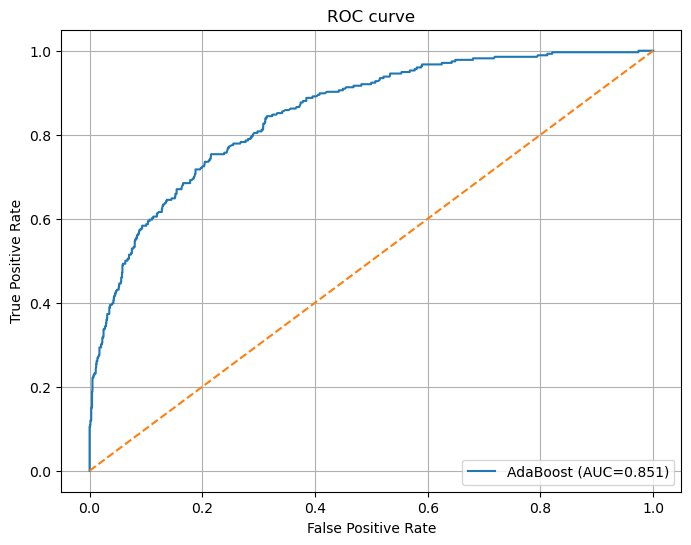

In [60]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# --- Datos (ya los tienes: X_train, X_test, y_train, y_test) ---
# X_train, X_test, y_train, y_test

# --- Detectar si es binario o multiclase ---
unique_classes = np.unique(y_train)
is_multiclass = len(unique_classes) > 2

# elegir scoring adecuado
if is_multiclass:
    scoring = 'roc_auc_ovr'  # o 'roc_auc_ovo'
else:
    scoring = 'roc_auc'

# base estimator
base = DecisionTreeClassifier(random_state=42)

ada = AdaBoostClassifier(estimator=base, random_state=42)

# --- Grilla sugerida ---
param_grid = {
    'n_estimators': [50, 100, 200, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
    'estimator__max_depth': [1, 2, 3]   # árboles débiles típicos
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- Opción 1: GridSearch (exhaustivo) ---
grid = GridSearchCV(
    ada,
    param_grid,
    scoring=scoring,
    cv=cv,
    n_jobs=-1,
    verbose=2
)
grid.fit(X_train, y_train)
best_model_grid = grid.best_estimator_
print("GridSearch - mejores params:", grid.best_params_)
print("GridSearch - mejor score CV (AUC):", grid.best_score_)

# --- Opción 2: RandomizedSearch (si la grilla es grande) ---
from scipy.stats import randint, uniform
param_dist = {
    'n_estimators': randint(50, 501),
    'learning_rate': uniform(0.01, 0.99),  # 0.01..1.0
    'estimator__max_depth': randint(1, 5)
}
random_search = RandomizedSearchCV(
    ada,
    param_distributions=param_dist,
    n_iter=40,
    scoring=scoring,
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=2
)
random_search.fit(X_train, y_train)
best_model_rand = random_search.best_estimator_
print("RandomSearch - mejores params:", random_search.best_params_)
print("RandomSearch - mejor score CV (AUC):", random_search.best_score_)

# --- Elegir el mejor (compara ambos resultados y usa el mejor) ---
# Aquí uso el de Randomized si su score CV es mejor, sino el de Grid:
if random_search.best_score_ >= grid.best_score_:
    best_model = best_model_rand
    print("Seleccionado: RandomizedSearch")
else:
    best_model = best_model_grid
    print("Seleccionado: GridSearch")

# --- Evaluación final en test ---
# Para multiclase hay que binarizar para ROC multiclass
if is_multiclass:
    y_test_bin = label_binarize(y_test, classes=unique_classes)
    y_score = best_model.predict_proba(X_test)
    # calcular AUC macro promedio
    auc_score = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
else:
    y_score = best_model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_score)

print("AUC en test:", auc_score)

# --- Graficar ROC (binary o multiclass por curvas por clase) ---
plt.figure(figsize=(8, 6))

if is_multiclass:
    # dibujar ROC para cada clase
    y_test_bin = label_binarize(y_test, classes=unique_classes)
    for i, cls in enumerate(unique_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        plt.plot(fpr, tpr, label=f'Clase {cls} (AUC={auc(fpr,tpr):.3f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title('ROC multiclass por clase')
else:
    fpr, tpr, _ = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, label=f'AdaBoost (AUC={auc(fpr,tpr):.3f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title('ROC curve')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Stacking

In [47]:
estimators=[('dt', DecisionTreeClassifier()), ('lg', LogisticRegression())]

In [48]:
stacking = StackingClassifier(estimators= estimators )
stacking.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

StackingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                               ('lg', LogisticRegression())])

In [49]:
y_pred_stacking=stacking.predict(X_test)

# Calcular el Accuracy
accuracy_stacking=accuracy_score(y_test, y_pred_stacking)

accuracy_stacking

0.8356579745300182